### Übung1- UCR Time Series Analysis(FordA)
Name：Yiling Li <br>
Matrikelnummer：108980 <br>
Python：3.10 <br>
Datensatz：FordA von UCR Time Series Classification Archive <br>

### 1. Data Loading:
Laden Sie den gewählten Datensatz in Python ein.

In [3]:
import numpy as np
import pandas as pd

train_path = r"/Users/liyiling/Documents/Albstadt学习/2025WW/Python-Advanced-Herr Seidler/Übung1_Yiling Li/FordA/FordA_TRAIN.tsv"
test_path  = r"/Users/liyiling/Documents/Albstadt学习/2025WW/Python-Advanced-Herr Seidler/Übung1_Yiling Li/FordA/FordA_TEST.tsv"

def load_ucr_data(file_path):
    data = []
    labels = []
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            labels.append(float(parts[0]))
            values = [float(x) for x in parts[1:]]
            data.append(values)
    return np.array(data), np.array(labels)

X_train, y_train = load_ucr_data(train_path)
X_test, y_test   = load_ucr_data(test_path)

### 2. Data Unterstanding:  <br>
Stellen Sie die wesentlichen Charakteristiken des Datensatzes dar
(z.B. Anzahl Samples, Abtastrate, Klassen, …)

In [49]:
# Anzahl der Trainingsproben
X_train.shape


(3601, 500)

In [50]:
# Anzahl der Testproben
X_test.shape

(1320, 500)

In [7]:
# Abtastrate (Anzahl der Merkmale pro Probe)
num_features = X_train.shape[1]
num_features

500

In [8]:
# Klassen im Datensatz
unique_classes = np.unique(y_train)
unique_classes

array([-1.,  1.])

In [10]:
# die Menge NaN-Werte
num_nan_train = np.isnan(X_train).sum()
num_nan_train

np.int64(0)

### 3. Data Exploration:
- Machen Sie sich mit dem Datensatz vertraut (z.B. Zielgrößen, Anzahl Missing Values).
- Erstellen Sie Grafiken, um den Datensatz besser zu verstehen (z.B. Ausreißer, Rauschen).
- Fassen Sie Ihre Erkenntnisse für die nachfolgenden Phasen zusammen.

In [16]:
# Zielgrößen
unique_classes, unique_class_counts = np.unique(y_train, return_counts=True)
print(f"Klassen sind: {unique_classes} ")
print(f"Verteilung sind: {unique_class_counts}")

Klassen sind: [-1.  1.] 
Verteilung sind: [1846 1755]


In [17]:
# Anzahl Missing Values
num_nan_train = np.isnan(X_train).sum()
num_nan_test  = np.isnan(X_test).sum()
print(f"Anzahl der NaN-Werte im Trainingssatz: {num_nan_train}")
print(f"Anzahl der NaN-Werte im Testsatz: {num_nan_test}")

Anzahl der NaN-Werte im Trainingssatz: 0
Anzahl der NaN-Werte im Testsatz: 0


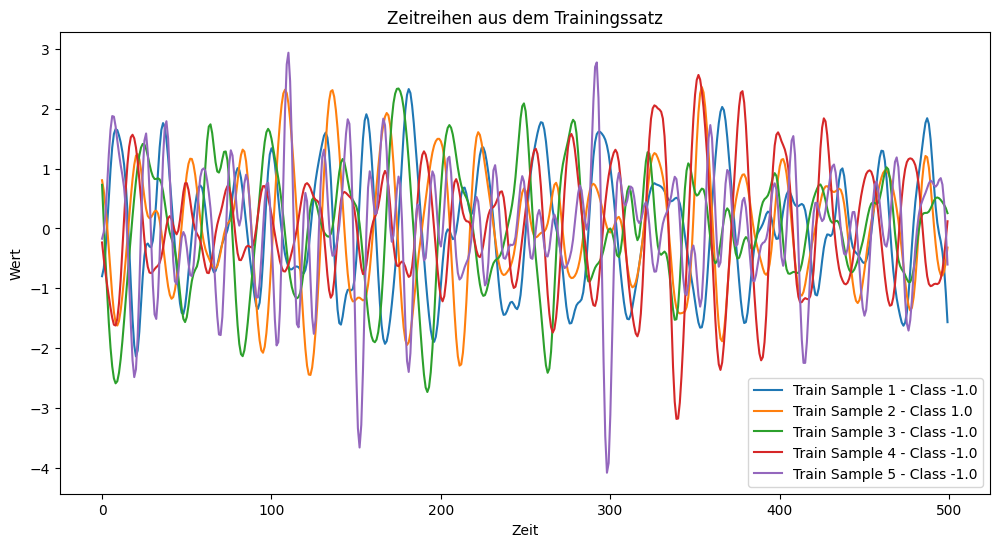

In [19]:
# Grafiken zur Visualisierung einiger Zeitreihen
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(X_train[i], label=f'Train Sample {i+1} - Class {y_train[i]}')
plt.title('Zeitreihen aus dem Trainingssatz')
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.legend()
plt.show()

Anzahl potenzieller Ausreißer in diesem Sample: 0
Geschätztes Rauscheniveau (Median der rollenden Std): 0.7583190352212926
Das Signal scheint ein hohes Rauscheniveau zu haben.


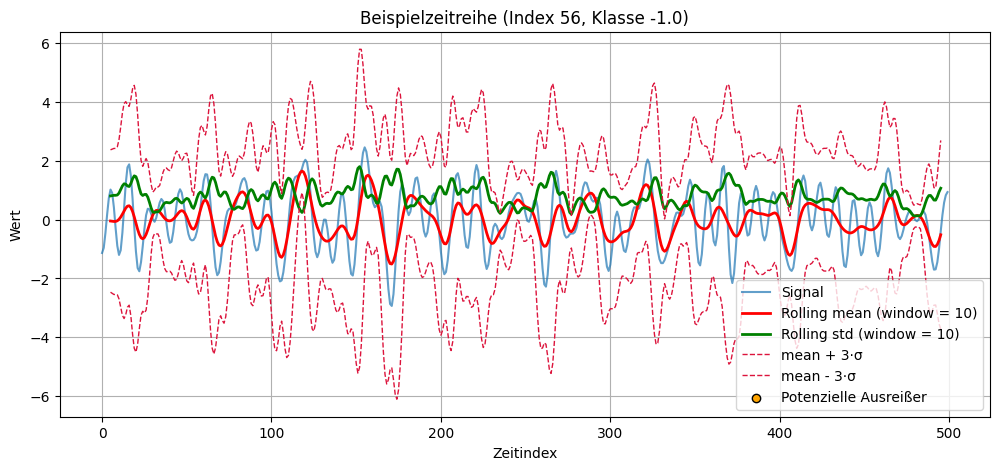

In [46]:
# Ausreißer und Rauschen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample_idx = 56           # index=56 als Beispiel
signal = X_train[sample_idx]
label  = y_train[sample_idx]

window=10

df = pd.DataFrame({"signal": signal})
df["rolling_mean"] = df["signal"].rolling(window=window, center=True).mean()
df["rolling_std"]  = df["signal"].rolling(window=window, center=True).std()

# print(f"Rolling mean und std (window={window}):", df["rolling_mean"], df["rolling_std"])

df["upper"] = df["rolling_mean"] + 3 * df["rolling_std"]
df["lower"] = df["rolling_mean"] - 3 * df["rolling_std"]

# Ausreißer identifizieren
ausreißer_mask = (df["signal"] > df["upper"]) | (df["signal"] < df["lower"])
ausreißer_idx = np.where(ausreißer_mask)[0]
len(ausreißer_idx), ausreißer_idx[:10]
num_ausreißer = len(ausreißer_idx)
print(f"Anzahl potenzieller Ausreißer in diesem Sample: {num_ausreißer}")

# Rauscheniveau schätzen
rauschen_niveau = df["rolling_std"].median()
print(f"Geschätztes Rauscheniveau (Median der rollenden Std): {rauschen_niveau}")

if rauschen_niveau >0.5:
    print("Das Signal scheint ein hohes Rauscheniveau zu haben.")
else:
    print("Das Signal scheint ein niedriges Rauscheniveau zu haben.")

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df["signal"], label="Signal", alpha=0.7)
ax.plot(df["rolling_mean"], color="red", linewidth=2,
        label=f"Rolling mean (window = {window})")
ax.plot(df["rolling_std"], color="green", linewidth=2 ,
        label=f"Rolling std (window = {window})")
ax.plot(df["upper"], "--", color="crimson", linewidth=1, label="mean + 3·σ")
ax.plot(df["lower"], "--", color="crimson", linewidth=1, label="mean - 3·σ")

# Ausreißer
ax.scatter(ausreißer_idx, df["signal"].iloc[ausreißer_idx],
           color="orange", edgecolors="black",
           label="Potenzielle Ausreißer", zorder=5)

ax.set_title(f"Beispielzeitreihe (Index {sample_idx}, Klasse {label})")
ax.set_xlabel("Zeitindex")
ax.set_ylabel("Wert")
ax.grid(True)
ax.legend()
plt.show()

#### 1. Grundlegendes Verständnis des Datensatzes
- Der Datensatz enthält zwei Zielklassen: -1 und 1.
- Die Trainingsdaten umfassen 3601 Samples, die Testdaten 1320 Samples.
- Jede Zeitreihe besteht aus 500 Messpunkten eines Motorsensors.
- Es wurden keine fehlenden Werte (NaN) festgestellt.
- Die Klassenverteilung ist leicht unausgeglichen, aber akzeptabel-– 1 (1846 Samples) und Klasse 1 (1755 Samples) nahezu gleich häufig auftreten.

#### 2. Visuelle Analyse der Zeitreihen
Zur besseren Einschätzung der Rohdaten wurden mehrere Zeitreihen visualisiert:
- Die Zeitreihen zeigen deutliches Rauschen und starke Schwankungen.
- Ein klarer Trend ist nicht erkennbar, da die geglättete Rolling-Mean-Kurve weitgehend horizontal verläuft und keine anhaltende Auf- oder Abwärtsbewegung zeigt.
- In den visualisierten Beispielen sind keine starken globalen Ausreißer sichtbar.
- Die beiden Klassen weisen ähnliche Grundstrukturen auf, was nahelegt, dass eine reine visuelle Trennung schwierig ist.
    - glättete Trendlinie (rolling mean)
    - hohe lokale Varianz (rolling std) → Hinweis auf Rauschen
    - Nur sehr wenige bzw. keine Punkte außerhalb von mean ± 3σ → kaum klassische Ausreißer

#### 3. Erkenntnisse für die weiteren Phasen
Aus den beobachteten Eigenschaften ergeben sich folgende Schlussfolgerungen:
Da die Rohdaten stark verrauscht sind, ist eine direkte Modellierung im Zeitbereich wenig sinnvoll.
Die geringe Anzahl an Ausreißern deutet darauf hin, dass keine aggressive Ausreißerbehandlung notwendig ist.

Die starke Variabilität und das dominierende Rauschen sprechen für den Einsatz von
Feature-Extraktionsmethoden wie TSFEL, tsfresh oder Catch22.

Vor der Modellierung werden Schritte wie Skalierung, ggf. Filterung und eine geeignete
Feature-Selektion empfohlen.

Insgesamt zeigt die Data Exploration, dass der FordA-Datensatz gut für eine Feature-basierte Klassifikation geeignet ist, während eine reine Nutzung der Rohzeitreihen aufgrund des starken Rauschanteils problematisch wäre.